<a href="https://colab.research.google.com/github/kytk/AI-MAILs/blob/main/python_2-1_dl_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-MAILs 深層学習入門: 概要

Ver. 20220807

## 本セクションの目標
- 深層学習の概要について理解する
- 深層学習にまつわるキーワードを理解する

## 参考書

| Francois Chollet | 斎藤 勇哉 | 斎藤 康毅 |
| :--: | :--: | :--: |
| PythonとKerasによる<br>ディープラーニング | 動かしながら学ぶ<br>PyTorchプログラミング入門 | ゼロから作るDeep Learning |
| <img src="https://www.nemotos.net/nb/img/keras_2nd_cover.jpg" width="100"> | <img src="https://www.nemotos.net/nb/img/pytorch_cover.jpg" width="100"> | <img src="https://www.nemotos.net/nb/img/dl_from_scratch_cover.png" width="100"> |

## 参考サイト
| K-lab/脳画像解析eラーニング |
| :--: |
|<a href="https://nemotos.net/?page_id=2436" target="_blank"><img src="https://www.nemotos.net/nb/img/k-lab.png" width="300"></a> |

## 目次
- A. 人工知能, 機械学習, 深層学習
- B. 深層学習の概要
    1. ニューラルネットワークの最小単位
    2. 深層学習 の流れ
    3. 隠れ層 hidden layer の意義
    4. 全結合層 Fully-connected layer / Dense layer
    5. 活性化関数
    6. 画像および教師データの変形
    7. 損失関数
    8. オプティマイザ (最適化関数)
    9. バッチ処理
- C. 畳み込みニューラルネットワーク
- D. 深層学習専用のフレームワーク

## A. 人工知能, 機械学習, 深層学習

| <img src="https://www.nemotos.net/nb/img/ai_ml_dl.png" width="500"> |
| ---: |
| 「PythonとKerasによるディープラーニング」より引用 |

| 日本語名 | 英語名 | 略語 |
| :-- | :-- | :-- |
| 人工知能 | Artificial Intelligence | AI |
| 機械学習 | Machine Learning | ML |
| 深層学習 | Deep Learning | DL |

- 人工知能: 「本来ならば人が行う知的な作業を自動化する取り組み」いちばん広い概念
- 機械学習: 「特定のタスクの実行方法をコンピュータが学習する」
    - 従来のプログラミング
        - 人が「ルール」と「データ」を準備し、コンピュータはルールに従ってデータを処理する
    - 機械学習のプログラミング
        - 人は「データ」と「データから期待される答え」を準備し、コンピュータは「ルール」を出力する。
        - システムは「訓練」されながらルールの精度を高めていく

| <img src="https://www.nemotos.net/nb/img/programming_paradigm.png" width="500"> |
| ---: |
| 「PythonとKerasによるディープラーニング」より引用 |
    
- 深層学習: 機械学習の一種であり、データの特徴がどう表現(representation)されるかを学習する枠組み
    - 入力されたデータを、複数の「層」からなるネットワークを通す。各層は入力されたデータから「特徴量」を学習し、それを次の層に渡していく。入力層と出力層の間にある層は「隠れ層」と呼ばれる

## B. 深層学習の概要

### 1. ニューラルネットワークの最小単位
- ニューラルネットワークの最小単位は、入力信号 $x$、バイアス(bias)、重み(weight)、活性化関数(activation function)、出力(かつ次の入力)信号 $y$ で構成される。図の○をユニットと呼ぶ

<img src="https://www.nemotos.net/nb/img/minimal_component.png" width="300">

- 第1層にある 信号 $x$ が次の層に渡される時、重みを掛けることで重みづけがされる。重み weight は $w$ で表す。そして、$xw$ の結果に対し、さらにバイアス $b$ を付加する。一部のニューラルネットワークにはハンデを与えるようなイメージである。バイアス bias は $b$ として表す。この場合、次の層に行く信号は、$xw + b$ で表される
- 第2層には関数が準備されている。先程の $xw + b$ がこの関数で処理され、その結果、出力信号 $y$ となる。この関数を、**活性化関数 activation function** という。上の図は、数式で表すならば、$ y = a(xw + b)$ と表される
- 実際は、$y$ が次の層への入力となる。第2層が **隠れ層 hidden layer** の場合、頭文字をとって $h$ と表される

### 2. 深層学習の流れ

| <img src="https://www.nemotos.net/nb/img/dl_overview.png" width="500"> |
| ---: |
| 「PythonとKerasによるディープラーニング」より引用 |

- 入力 $x$ は重み $w$ で重みづけされて第1層に入っていく。第1層で活性化関数で処理された値となる
- 第1層で処理された値は、別の重みで重みづけされて第2層に入っていく。第2層以降でも別の活性化関数で処理される
- これらを繰り返し、最後に予測値 $y'$ が出力される
    - 上の3つの流れを、**順伝播 forward propagation** という 
- 予測値 $y'$ は 真の値 $y$ と比較される
- 予測値と真の値を **損失関数 loss function** で処理することで、**損失値 loss** を算出する
- 損失値が0に近づけば近づくほど、モデルは正確となる
- 損失関数を最小にするように重みを更新する
    - 上の4つの流れを、**逆伝播 backward propagation** という
- 順伝播と逆伝播を繰り返し、パラメータが適切な値に収束したら、別のデータセットを使用して、そのモデルが妥当かどうかを評価する。これを**バリデーション validation** という

### 3. 隠れ層 hidden layer の意義

- ここで、隠れ層の意義について考えてみる

<img src="https://www.nemotos.net/nb/img/dl_overview_1.png" width="500">

#### 問題
- 2つのベクトル $x_1$, $x_2$ と 5つの活性化関数 NOT, OR, NOR, AND, NAND を使って、以下のベクトル を表現してください

| x1 | x2 |
| :--: | :--: |
| 0 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 1 |

- 活性化関数
    - NOT: 0と1が入れ替わる
    - OR: x1 と x2 の要素のどちらかが 1 ならば 1 (どちらが1でも1), どちらも 0 ならば 0
    - NOR: OR の結果をNOTに代入する
    - AND: x1 と x2 の要素のどちらも 1 ならば 1, それ以外は0
    - NAND: AND の結果をNOTに代入する
    

| x1 | x2 | NOT(x2) | OR(x1,x2) | NOR(x1,x2) | AND(x1,x2) | NAND(x1,x2) |
| -- | -- | -- | -- | -- | -- | -- |
| 0 | 0 | 1 | 0 | 1 | 0 | 1 |
| 0 | 1 | 0 | 1 | 0 | 0 | 1 |
| 1 | 0 | 1 | 1 | 0 | 0 | 1 |
| 1 | 1 | 0 | 1 | 0 | 1 | 0 |

#### 問題1. $y_1$ (簡単)

| y1 |
| -- |
| 1 |
| 0 |
| 0 |
| 0 |

- 図式にすると以下のように示せる

<img src="https://www.nemotos.net/nb/img/nor_y1.png" width="300">

- NOR($x_1$,$x_2$) は下のようなグラフを書くための関数ともいえる

| x1 | x2 | NOR(x1,x2) |
| -- | -- | -- |
| 0 | 0 | 1 (●) |
| 0 | 1 | 0 (◆) |
| 1 | 0 | 0 (◆) |
| 1 | 1 | 0 (◆) |

<img src="https://www.nemotos.net/nb/img/nor_x1_x2_graph.png" width="300">

- 直線で○と◇を2分割できるようなグラフはひとつの関数で書ける


#### 問題2. $y_2$ (難しい)

| x1 | x2 |  | y2 |
| -- | -- | -- | -- |
| 0 | 0 |   | 0 |
| 0 | 1 |   | 1 |
| 1 | 0 |   | 1 |
| 1 | 1 |   | 0 |

- $y_2$ はグラフで表すと以下のように示せる

<img src="https://www.nemotos.net/nb/img/xor_graph.png" width="300">

- この○と◇を2分割するには曲線を書くしかない

<img src="https://www.nemotos.net/nb/img/xor_graph_with_line.png" width="300">

- この問題を解くには、中間層を作る必要がある

| x1 | x2 |  | s1 = NAND(x1,x2) |
| -- | -- | -- | -- |
| 0 | 0 |   | 1 |
| 0 | 1 |   | 1 |
| 1 | 0 |   | 1 |
| 1 | 1 |   | 0 |  

<img src="https://www.nemotos.net/nb/img/x1_x2_nand_s1.png" width="300">

| x1 | x2 |  | s2 = OR(x1,x2) |
| -- | -- | -- | -- |
| 0 | 0 |   | 0 |
| 0 | 1 |   | 1 |
| 1 | 0 |   | 1 |
| 1 | 1 |   | 1 |

<img src="https://www.nemotos.net/nb/img/x1_x2_or_s2.png" width="300">

| s1 | s2 |  | y2 = AND(s1,s2) |
| -- | -- | -- | -- |
| 1 | 0 |   | 0 |
| 1 | 1 |   | 1 |
| 1 | 1 |   | 1 |
| 0 | 1 |   | 0 |

<img src="https://www.nemotos.net/nb/img/s1_s2_and_y2.png" width="300">

- これらをすべてまとめると、以下になる

<img src="https://www.nemotos.net/nb/img/nand_or_and_y2.png" width="500">

- $x_1$, $x_2$ を **NAND**関数で処理した出力を $s_1$, **OR**関数で処理した出力を $s_2$ とした後、$s_1$, $s_2$ を入力データとして **AND**関数 で処理することにより、$y_2$ を求めることができた
- 重み付けはしていない。$w$ はすべて1となる
- 今の場合の $s_1$, $s_2$ に相当する層を 「**中間層**」 または 「**隠れ層**」 と呼ぶ
- 深層学習は、隠れ層を上手に使うことによって、**データを線形だけでなく非線形に分類できる**


### 4. 全結合層 Fully-connected layer / Dense layer
- 全結合層の「層」はユニットのある層でなく、ユニットとユニットが結合されている層を指す
- Dense層とも呼ばれる
- 全結合層の定義：ある層における個々のユニットと、次の層にあるユニットがすべて連結している

<img src="https://www.nemotos.net/nb/img/fully_connected_layer.png" width="400">

- 全結合層は、行列演算で簡単に表示することができる
    - 結合の重みづけを w, バイアスを b で表示
    
<img src="https://www.nemotos.net/nb/img/weight_bias.png" width="350">

- 深層学習でよく使われる w のルール
    - 今いる層の 1番め のユニットと、前の層の 3番目 のユニットを結ぶ線の重みは、$w_{13}$ と表現する
    - 重みを考える際、基準になる層は、データが「入ってくる」層

$$
\begin{bmatrix}
h_1 \\
h_2 \\
h_3
\end{bmatrix}
= 
\begin{bmatrix}
1 & x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
b_1 & b_2 & b_3 \\ 
w_{11} & w_{21} & w_{31}\\
w_{12} & w_{22} & w_{32}\\
w_{13} & w_{23} & w_{33}
\end{bmatrix}
$$

### 5. 活性化関数

<img src="https://www.nemotos.net/nb/img/activation_function.png" width="600">

- 深層学習によく用いられる活性化関数として、以下の3つが挙げられる
    - **ReLU**関数: 隠れ層に用いられる
    - **Sigmoid**関数: 2クラス分類の出力層に用いられる (犬/猫, 健常/疾患)
    - **Softmax**関数: 多クラス分類の出力層に用いられる (数字の判別, 3クラス以上の判別)

- 活性化関数の特徴

| 関数名 | 特徴 | 
| :-- | :-- |
| ReLU | 隠れ層に使うことで、非線形問題を解くことができるようになる <br> Sigmoid関数は0-1の値しかとらないので層が厚くなるほど誤差が小さくなっていき、<br>入力層まで誤差が伝搬する前に誤差が消失するという勾配消失問題が発生する |
| Sigmoid | 0-1の間の確率で表現可能なため、2クラス分類の出力層に用いる |
| Softmax | 各クラスの確率の総和が1となるように正規化された関数であるため、多クラス分類の出力層に用いる |

#### ReLU関数
- **Re**ctified **L**inear **U**nit 関数の略
    - rectify: 整流する
- 負の信号はすべて0とし、正の信号はそのままとする


- 隠れ層で使われることが多い
    - 計算式がシンプルなので処理が速い
    - 0以下は0となるため、信号を発生しないユニットを表現できる


- 数式では以下で表される

$$
relu(x) = 
\begin{cases}
x & (x > 0)\\
0 & (x \leq 0)
\end{cases}
$$

In [1]:
# numpy を np としてインポート
import numpy as np

# matplotlib でグラフを描画するために matplotlib.pyplot を plt としてインポート
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# relu 関数を定義
def relu(x):
  return np.maximum(0, x)

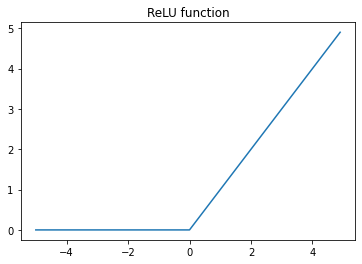

In [3]:
# relu 関数を描画
# xは-5.0から5.0まで0.1刻み
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
# x と y をプロット
plt.plot(x, y)
# グラフのタイトルを "ReLU function" に設定
plt.title("ReLU function")
# いざ、描画
plt.show()

In [4]:
# ReLU の効果を実感してみる
# 正規分布の 5 x 3 の行列を作成 np.random.randn で作成できる
np.random.seed(seed=42) #皆が同じ結果を得ることができるようにする
a = np.random.randn(5,3)

In [5]:
# aの内容を表示
a

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783]])

In [6]:
# relu 関数にかけると、負の値が 0 となり、それ以外はそのままであることがわかる
relu(a)

array([[0.49671415, 0.        , 0.64768854],
       [1.52302986, 0.        , 0.        ],
       [1.57921282, 0.76743473, 0.        ],
       [0.54256004, 0.        , 0.        ],
       [0.24196227, 0.        , 0.        ]])

#### Sigmoid関数

- 以下の数式であらわされる関数であり、出力は0と1の間に収束する

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

- $x$ が大きくなる → $e^{-x}$ が小さくなる → 値は 1 に近づく
- $x$ が小さくなる → $e^{-x}$ が大きくなる → 値は 0 に近づく


- 2つのものを分類するような時に使われる
    - 0.5以上だったら A, 0.5未満だったら B

In [7]:
# sigmoid関数を定義
def sigmoid(x):
  return 1 / (1+np.exp(-x))

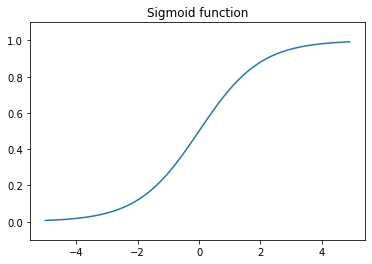

In [8]:
# sigmoid関数を描画
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
# y軸は -0.1 から 1.1 までの範囲に設定
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid function")
plt.show()

#### Softmax関数
- 主に多クラスの分類問題の出力層で使われる関数
- 出力層がn個のユニットで構成される時、k番目の出力 $y_k$ は、数式では以下であらわされる

$$
y_k = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}} = \frac{e^{a_k}}{e^{a_1} + e^{a_2} + ... + e^{a_n}}
$$


- Softmax関数は、出力をすべて足すと 1 になることから、それぞれの出力を「確率」として扱える
    - 出力層が4つのユニットから構成され、それぞれの出力が [0.1, 0.6, 0.1, 0.2] だとすると、「2番めのユニットが最も確率が高いので、答えは2番め」「答えは60%の確率で2番め、20%で4番目、10%で1番目か3番目」といったように表現できる


### 6. 画像および教師データの変形
#### 画像の変換
- 深層学習は大量のデータを扱う
- 2次元画像は行列で表示されるが、大量に扱う時は、使い勝手が悪い
- 全結合層のみの基本的なニューラルネットワークでは、1つの画像を1行の行列で表示する。こうすることで、多くの画像をひとつの行列で扱うことができる


In [9]:
# 数字を 5x4 の行列で(画像として)表示してみる
zero = np.array([[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]])
one = np.array([[0,0,1,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[0,0,1,0]])
two = np.array([[1,1,1,1],[0,0,0,1],[1,1,1,1],[1,0,0,0],[1,1,1,1]])
three = np.array([[1,1,1,1],[0,0,0,1],[1,1,1,1],[0,0,0,1],[1,1,1,1]])
four = np.array([[1,0,0,1],[1,0,0,1],[1,1,1,1],[0,0,0,1],[0,0,0,1]])
five = np.array([[1,1,1,1],[1,0,0,0],[1,1,1,1],[0,0,0,1],[1,1,1,1]])

# 0, 1, 2, 3, 4, 5 を nsets という3次元の配列に格納する
nsets = np.array([zero,one,two,three,four,five])

In [10]:
# nsets は 6つの数字 x 5 x 4
nsets.shape

(6, 5, 4)

In [11]:
# nsets の次元は 3次元
nsets.ndim

3

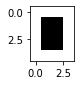

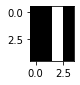

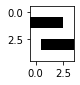

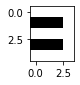

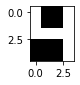

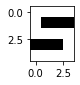

In [12]:
# for ループを使って、それぞれの数字の配列を可視化する
for i in nsets:
    # 図のサイズを 1.25 x 1 インチに設定
    plt.figure(figsize=(1.25,1))
    # 配列 nsets の内容をひとつずつ表示
    plt.imshow(i, cmap = 'gray')
    plt.show()

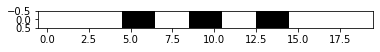

In [13]:
# reshape メソッドを使うことで数字の 0 をベクトル化する
# 今は 5 x 4 の行列のため、20の要素がある → 1行20列にしたい
# reshape の 引数を -1 にすると、もうひとつの引数から推測してくれる

# 変数 zero を ベクトルにしたものを zero_vector に代入する
zero_vector = zero.reshape(1,-1) # zero.reshape(1,20) と同じ意味
# 可視化してみる
plt.imshow(zero_vector,cmap='gray')
plt.show()

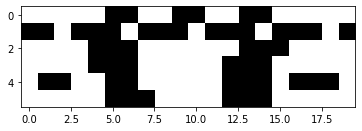

In [14]:
# nsets も同様に、全ての数字をベクトルにする
# 数字が 6つ あるので、6行20列で今、ここにあるすべての数字を表現できる
nsets_vector = nsets.reshape(6,-1)
plt.imshow(nsets_vector,cmap='gray')
plt.show()

# 1行がひとつの数字をあらわす

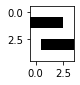

In [15]:
# reshape の特性から情報がきちんと保存されていることを確認
# nsets の 3行目(インデックスは2)を取り出して変数 a に代入する
a = nsets[2,:]
# 5行4列に戻す
b = a.reshape(5,4)
# 可視化する
plt.figure(figsize=(1.25,1))
plt.imshow(b, cmap='gray')
plt.show()

#### 教師データの変換
- 手書き数字の分類を行う場合、教師データは、シンプルに"0" "1" "2" という数字で提供されている
- 深層学習では、この数字を **"One-hot ベクトル"** に変換する
- One-hot とは、「ひとつだけホット、あとはコールド」という意味
- ホットは 1, コールドは 0 で表現する
- 数字の分類であれば、カテゴリ(クラスとも言う)は 10 (0-9)
- 0, 1, 2, 3, 4, 5 を one-hot ベクトル に次のように変換する

$$
0 = 
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
1 = 
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
2 = 
\begin{bmatrix}
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
3 = 
\begin{bmatrix}
0 \\
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
4 = 
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
5 = 
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$$

- こうすることで、Softmax関数の結果と照らし合わせることが可能となる

$$
softmax \ output =
\begin{bmatrix}
0.7 \\
0.01 \\
0.03 \\
0.01 \\
0.01 \\
0.01 \\
0.01 \\
0.01 \\
0.2 \\
0.01
\end{bmatrix}
one \ hot \ vector = 
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$$

### 7. 損失関数
- 損失関数 loss function: 予測値と真の値の違いを表現する関数
- 脳画像解析の世界では cost function と呼ばれるものと同じ
- 損失関数の出力: 損失値 loss
    - 損失値 loss が最小になれば、予測値は真の値に近づく
- 損失関数には複数あるが、代表的なものとして、2乗和誤差と交差エントロピー誤差を紹介
- 損失関数の使い分け

| 目的 | 関数名 | Function Name | 損失関数名<br>(Tensorflow) | 損失関数名(PyTorch) |
| :-- | :-- | :-- | :-- | :-- |
| 回帰 | 平均二乗誤差 | Mean Squared Error | mean_squared_error | nn.MSELoss |
| 2クラス分類 | バイナリ交差エントロピー | Binary Cross Entropy | binary_crossentropy | nn.BCELoss |
| 多クラス分類 | ソフトマックス交差エントロピー | Softmax Cross Entropy | categorical_crossentropy (one-hot vector用)<br> sparse_categorical_crossentropy | nn.CrossEntropyLoss |

<img src="https://www.nemotos.net/nb/img/dl_overview_2.png" width="500">

#### 2乗和誤差 sum of squared error
- k次元の予測値を $y_k$, 真の値(教師データ)を $t_k$ とすると、2乗和誤差は以下で表現される

$$
E = \frac{1}{2}\sum_k (y_k - t_k)^2
$$

- 各データに対して、「真の値と予測値の差分の2乗」を計算し、それを総和した値
- $\frac{1}{2}$ は微分する時に計算がしやすくなるような工夫
- one hot ベクトルを使うと、すぐに計算できる

In [16]:
# 損失関数として、2乗和誤差を定義
def sum_of_squared_error(y,t):
    return 0.5 * np.sum((y - t)**2)

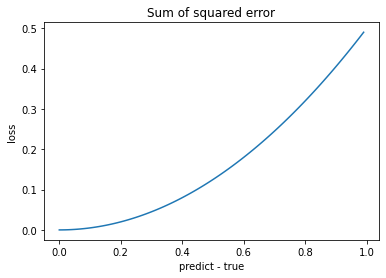

In [17]:
# 1次元における2乗和誤差を描画
x = np.arange(0,1,0.01)
y = 0.5 * x**2
plt.plot(x,y)
plt.title('Sum of squared error')
plt.xlabel("predict - true")
plt.ylabel('loss')
plt.show()

In [18]:
# 手書きの数字画像を認識させるモデルを考える
# 出力層の活性化関数は Softmax関数
# ここでの ya は上図の予測値 Y' に相当
ya = np.array([[0.01],[0.03],[0.7],[0.1],[0.01],[0.01],[0.01],[0.02],[0.1],[0.01]])
ya

array([[0.01],
       [0.03],
       [0.7 ],
       [0.1 ],
       [0.01],
       [0.01],
       [0.01],
       [0.02],
       [0.1 ],
       [0.01]])

In [19]:
# 2 が正解の one-hot ベクトル t2 を生成
# 上図での真の目的値 Y に相当
t2 = np.array([[0],[0],[1],[0],[0],[0],[0],[0],[0],[0]])
t2

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [20]:
# 損失関数に代入
# この結果が、損失値となる
sum_of_squared_error(ya,t2)

0.055900000000000026

In [21]:
# 5 が正解の one-hot ベクトル t5 を生成し、
# ya と t5 から損失を求める
# この場合、t5 が真の目的値となる
t5 = np.array([[0],[0],[0],[0],[0],[1],[0],[0],[0],[0]])
t5

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [22]:
# 損失関数に代入
# 正解が2のときよりはるかに大きい → 損失が大きい → モデルがよくない
sum_of_squared_error(ya,t5)

0.7458999999999999

#### 交差エントロピー誤差 cross entropy error
- 交差エントロピー誤差は、以下の数式で定義される

$$
E = -\sum_{k=1}^n t_k log (y_k)
$$

- n クラスのデータセットがあり、教師データが one-hot ベクトルの場合、 $t_k$ は正解は 1, 不正解は 0 となる
- k番目のクラスが正解とし、その時の予測確率を $y_k$ すると、その時の交差エントロピー誤差は以下となる

$$
E = -log(y_k)
$$

- つまり、交差エントロピー誤差は、予測値(確率)を対数変換したものであり、予測値が1に近づけば近づくほど小さくなる

In [23]:
# 損失関数として、交差エントロピー誤差を定義
def cross_entropy_error(y,t):
    #yが0になると無限大に発散してしまうため、小さな値を足すことで
    # 無限大に発散することを予防する
    delta = 1e-7 # 1e-7 は '10 の -7乗' を意味する
    return -np.sum(t * np.log(y + delta))


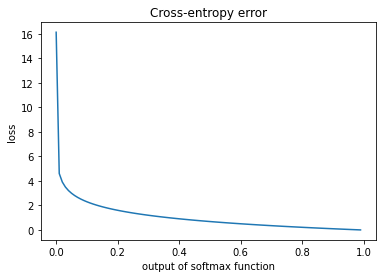

In [24]:
# 交差エントロピー誤差を描画
x = np.arange(0,1,0.01)
y = -np.log(x + 1e-7)
plt.plot(x,y)
plt.title('Cross-entropy error')
plt.xlabel('output of softmax function')
plt.ylabel('loss')
plt.show()

In [25]:
# 予測値 ya, 真の目的値 t2 に対して 交差エントロピー誤差を計算
cross_entropy_error(ya,t2)

0.3566748010815999

In [26]:
# 予測値 ya, 真の目的値 t5 に対して 交差エントロピー誤差を計算
cross_entropy_error(ya,t5)

4.605160186038091

### 8. オプティマイザ (最適化関数)

<img src="https://www.nemotos.net/nb/img/dl_overview_3.png" width="500">

- 深層学習の究極のゴールは、「損失値を0にすること」
- 損失を少しでも 0 に近づけるように重み付けパラメータを更新する
- パラメータと損失値の関係は下図のように関数で表現できる

| <img src="https://www.nemotos.net/nb/img/optimizer.png" width=400> |
| --: |
| 「PythonとKerasによるディープラーニング」より引用 |

- オプティマイザ(最適化関数)は最小値を見つける
- 直感的な理解としては、関数を微分することで局所における傾きを求め、傾きが 0 になるところを探す
- 微分だけでは、上図での極小値にトラップされてしまう可能性もある
- 微分に加えて関数の勾配による速度と加速度で生み出される「モーメンタム」を考慮することで、その問題を回避する
- ボールを落とした時にボールが坂道を転がりながら一番低いところにおさまっていくイメージ
- このプロセスが back propagation 逆伝播

| アルゴリズム | 大まかな説明 |
| :-- | :-- |
| 確率的勾配法 (SGD) | 勾配の分だけパラメータを減らす |
| モーメンタムSGD | SGD + モーメンタム (速度と慣性) |
| AdaGrad | 学習が進むほど学習率を小さくする |
| RMSprop |	AdaGrad + 直近の勾配ほど強く影響 |
| Adam | モーメンタムSGD + RMSprop |

### 9. バッチ処理

- オプティマイザでパラメータを最適化する際に、一度に入力するデータ数をバッチサイズという
- 以下のような特性があり、ミニバッチ学習がよく使われる

| 学習方法 | 学習手順 (図は [DXCEL WAVE](https://di-acc2.com/analytics/ai/6320/) より引用) | 
| :-- | :-- |
| バッチ学習 | <img src="https://www.nemotos.net/nb/img/batch_learning.jpg" width="400"> |
| オンライン学習 | <img src="https://www.nemotos.net/nb/img/online_learning.jpg" width="400"> |
| ミニバッチ学習 | <img src="https://www.nemotos.net/nb/img/minibatch_learning.jpg" width="400"> |


| 学習方法 | バッチサイズ | メリット | デメリット |
| :-- | :-- | :-- | :-- |
| バッチ学習 | 全データセット| ・全データを使うので<br>結果は安定しやすい | ・パラメータを1回更新するのに<br>全データセットに対して勾配を計算するため、<br>処理速度が遅い<br>・データが新しく追加になるたびに計算を<br>し直さないといけない |
| オンライン学習 | 1例 | ・リアルタイムでモデル<br>更新を頻繁に行う<br>ケースに適用しやすい | ・外れ値に影響され、<br>結果が不安定になりやすい |
| ミニバッチ学習 | ある程度<br>まとまった数 | バッチ学習と<br>オンライン学習の中間 | |


## C. 畳み込みニューラルネットワーク (Convolutional Neural Network; CNN)の基本的な理解
- 全結合層のみによるニューラルネットワークは、入力されたものの「全体」から特徴量を学習する
- 畳み込みニューラルネットワークは、入力されたものの「一部」の特徴量を学習することを繰り返す


### 1. 畳み込みニューラルネットワークの特徴

- 学習した局所パターンは、他の場所で出現しても認識される (translation-invariant: 平行移動不変性)
    - 下の例では、28ピクセルx28ピクセルで構成されている手書きの4の画像から、CNNは、3ピクセルx3ピクセルから構成される局所の情報(画像の縁はどうなっているか、画像の質感はどのような感じかなど)を学習していく
    - 局所で学習したものは、別の場所で登場したとしても、同様な情報として認識される(下図では、左下の2つの局所パターン、右上の2つの局所パターンはそれぞれ同じようなものとして認識される) → 学習効率がよくなる

| <img src="https://www.nemotos.net/nb/img/local_patterns.png" width=250> |
| --: |
| 「PythonとKerasによるディープラーニング」より引用 |

- CNNは、局所パターンの空間的ヒエラルキー(spatial hierarchies)を学習できる
    - 下の図では、猫の絵がまず入力されている
    - CNNは、まず、第1層で、基本的な形状を学習する(画像の縁の形状など)
    - 次に、第2層で、形状の組み合わせによるもう少し大きなパターンを学習する
    - それらを繰り返した結果に対して、教師データから「猫」と学習する

| <img src="https://www.nemotos.net/nb/img/spatial_hierarchy.png" width=400> |
| --: |
| 「PythonとKerasによるディープラーニング」より引用 |

- これらは、「畳み込み」と「プーリング」によって実現される
- CNNの登場により、深層学習の精度が飛躍的に向上することになった

### 2. 畳み込み層

（このセクションと次のセクションで用いる画像は、[定番のConvolutional Neural Networkをゼロから理解する](https://deepage.net/deep_learning/2016/11/07/convolutional_neural_network.html)より引用)

- ある画像を0と1で表現した時に、以下のように表現できたとする

<img src="https://deepage.net/img/convolutional_neural_network/5x5image.jpg" width="400">

- この画像を、左上から3x3の小さな行列だけ見ていくこととする。その際、下図のようなフィルタをかけることとする

<img src="https://deepage.net/img/convolutional_neural_network/filter.jpg" width="350">

- 左上から、フィルタをあてて、元の画像の画素とフィルタの数値をかけ算して、その合計を新しい行列に入れ込み、フィルタを少しずつずらしていく(ストライド)。これによって得られた新しい行列を「特徴量マップ」と呼ぶ

<img src="https://deepage.net/img/convolutional_neural_network/animated_convolution.gif" width="400">

- このようにフィルタをストライドさせていくことによって元画像の情報が「畳み込まれて」いくことにより、畳み込み層と呼ばれる
- ある画素の周囲9つの情報を取り込むことから、位置情報や周囲の画素との関係性を特徴として捉えることが可能になる

- なお、もとの行列のサイズなどが正方行列でない場合など、フィルタが適切に計算できないことがる。このような場合は、「ゼロパディング」といって、もとの行列の周辺に0をしきつめて計算できるようにする

### 3. プーリング層

- 畳み込み層で得られた特徴量マップに対し、マップを小分けにして、区域ごとに最大値や平均値を抽出する
- 最大値を抽出する方法を 最大値プーリング という

<img src="https://deepage.net/img/convolutional_neural_network/max_pooling.jpg" width="500">

- これにより、画像の微小な位置変化に対しても頑健になる
− 情報量を削減することもできる



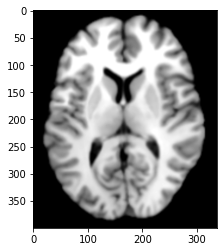

matrix size of brain.png is (400, 338)


In [32]:
# 脳画像を用いて実際に畳み込みと最大値プーリングを経験してみる

# 画像を読み込むため、PillowパッケージからImageモジュールを使用
from PIL import Image
# ファイルの有無を確認するために、osモジュールを使用
import os

# 画像をダウンロードする
# 画像がない場合のみダウンロードする
if os.path.exists('./brain.png'):
  pass
else:
  !wget 'https://www.nemotos.net/nb/img/brain.png' 


# 変数 im に画像をグレースケールで読み込む
im = Image.open('brain.png').convert('L')

# 変数 im を Numpy配列に変換
brain = np.array(im)

# 画素を正規化して、0-1の値にする
brain = brain / 255.0

# brain を表示
plt.figure
plt.imshow(brain,cmap='gray')
plt.show()

# 行列の大きさを確認
# 400行338列の大きさの画像
print('matrix size of brain.png is {}'.format(brain.shape))

In [33]:
# フィルタを準備する
# フィルタは 3x3 の単位行列とする

filter = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
print(filter)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


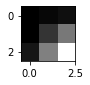

[[0.         0.00392157 0.00784314]
 [0.         0.02745098 0.0627451 ]
 [0.01176471 0.06666667 0.13333333]]


In [46]:
# 画像から、3x3の局所を取り出す
# 今、23行〜25行、103行〜105行の行列を取り出す

local_brain = brain[22:25,102:105]

plt.figure(figsize=(1,1))
plt.imshow(local_brain, cmap='gray')
plt.show()

print(local_brain)

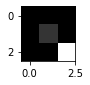

[[0.         0.         0.        ]
 [0.         0.02745098 0.        ]
 [0.         0.         0.13333333]]
feature is 0.16078431372549018


In [52]:
# 取り出した画像にフィルタをかける

local_brain_filtered = local_brain * filter

plt.figure(figsize=(1,1))
plt.imshow(local_brain_filtered, cmap='gray')
plt.show()

print(local_brain_filtered)

local_brain_feature = local_brain_filtered.sum()
print('feature is {}'.format(local_brain_feature))


In [48]:
# 画像全体に対してフィルタを使って畳み込みを行う
# ここではscipyパッケージのsignalモジュールに入っているconvolve2dを使って畳み込みを行う
from scipy import signal as sp

# 畳み込みを行った結果を brain_feature という変数に代入する
brain_feature = sp.convolve2d(brain, filter, boundary='fill', mode='valid')

# 行列数を確認
# 398行336列
# フィルターのサイズにもよるが、畳みこみはそこまで画像の大きさは変化させない
print('matrix size of brain.png is {}'.format(brain_feature.shape))

matrix size of brain.png is (398, 336)


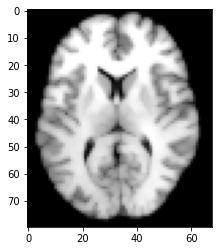

matrix size of brain.png is (80, 68)


In [49]:
# 最大値プーリングを行う
# ここではskimage.measureに入っているblock_reduceを使って行う
# 5x5のカーネル で 最大値プーリングする (5x5のマスごとに最大値を抜き出す)

import skimage.measure
# brain_feature を 5x5で区切って、最大値を計算する。
# 398行 / 5 = 79.6 → あまった行はそこの最大値を計算する
# 336列 / 5 = 67.2 → 同様にあまった列はそこの最大値を計算する

brain_pooled = skimage.measure.block_reduce(brain_feature, (5,5), np.max)

# brain_pooled を表示
# ぼやけているが、脳の形状は保持されている
plt.figure
plt.imshow(brain_pooled,cmap='gray')
plt.show()

# 行列数を確認
# 80行68列
# 最初に比べて情報量が削減された
print('matrix size of brain.png is {}'.format(brain_pooled.shape))

## D. 深層学習専用のフレームワーク
- 深層学習をPythonで実装する場合、深層学習に特化したフレームワークを使うのが一般的
- 2022年現在、2大巨頭は Tensorflow と PyTorch

| フレームワーク | Tensorflow | PyTorch |
| :--: | :-- | :-- |
| 開発 | Google | Facebook |
| 登場年| 2015年 | 2016年|
| 特徴 | Kerasを使うことで実装しやすい | ロジックの把握がしやすく、研究方面に強い |

- 今回は Tensorflow/Keras を使用
- 基本をしっかり理解できれば PyTorch にもすんなり移行できるはず

- 次のセクションで、実際にTensorflow/Keras を使って、手書き数字の識別にトライする